In [80]:
"""
Paul Scala
Z23561522
COP4613
March 10 2023
Assignment 4
Problem 2 part a
Link to Google Collab
https://colab.research.google.com/drive/1KTzSQex01eO5GB7AKanOXQM05Nk6Df0l?usp=sharing
"""


'\nPaul Scala\nZ23561522\nCOP4613\nMarch 10 2023\nAssignment 4\nProblem 2 part a\nLink to Google Collab\nhttps://colab.research.google.com/drive/1KTzSQex01eO5GB7AKanOXQM05Nk6Df0l?usp=sharing\n'

In [81]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork():
    
    def __init__(self, learning_rate):
        np.random.seed(1)
        self.weights = np.random.rand(3,1)
        self.learning_rate = learning_rate
        self.history = []
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward_propagation(self, inputs):
        z = np.dot(inputs, self.weights)
        return self.sigmoid(z)
    
    def train(self, inputs_train, labels_train, num_train_iterations):
        for epoch in range(num_train_iterations):
            # Forward propagation
            outputs = self.forward_propagation(inputs_train)

            # Backpropagation
            error = labels_train - outputs
            adjustment = self.learning_rate * np.dot(inputs_train.T, error * outputs * (1 - outputs))
            self.weights += adjustment

            # Save the history
            cost = np.mean(np.square(error))
            self.history.append((self.weights.copy(), cost))


In [82]:
# Define inputs and labels
inputs = np.array([[1, 1], [1, 0], [0, 1], [0.5, -1], [0.5, 3], [0.7, 2], [-1, 0], [-1, 1], [2, 0], [0, 0]])
labels = np.array([[1], [1], [0], [0], [1], [1], [0], [0], [1], [0]])

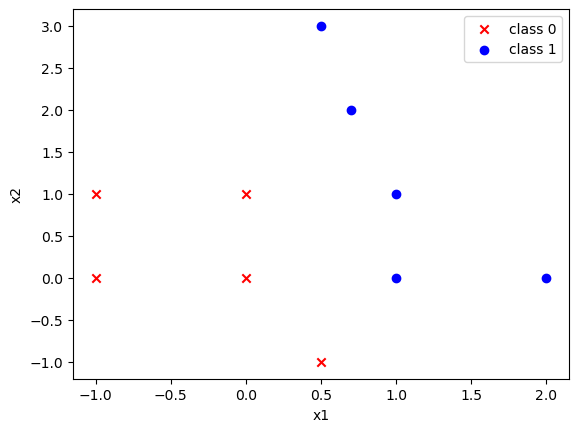

In [83]:
# Plot the data
plt.scatter(inputs[labels[:, 0] == 0, 0], inputs[labels[:, 0] == 0, 1], marker='x', color='r', label='class 0')
plt.scatter(inputs[labels[:, 0] == 1, 0], inputs[labels[:, 0] == 1, 1], marker='o', color='b', label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [84]:
# Add bias
inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))

In [85]:
# Create and train the network
network = NeuralNetwork(learning_rate=1)
network.train(inputs, labels, num_train_iterations=50)

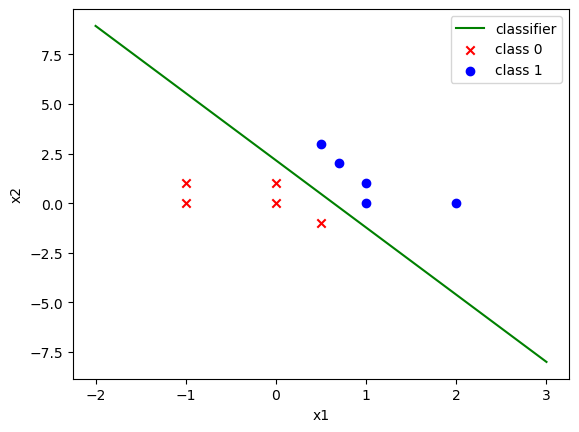

In [86]:
# Plot the final classifier line
x = np.linspace(-2, 3, 2)
y = -(network.weights[0] * x + network.weights[2]) / network.weights[1]
plt.plot(x, y, '-g', label='classifier')
plt.scatter(inputs[labels[:, 0] == 0, 0], inputs[labels[:, 0] == 0, 1], marker='x', color='r', label='class 0')
plt.scatter(inputs[labels[:, 0] == 1, 0], inputs[labels[:, 0] == 1, 1], marker='o', color='b', label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


/var/folders/s5/mn8yr8t96yj11lt5yw85vvn40000gn/T/ipykernel_20967/3604881912.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  history = np.array(network.history)


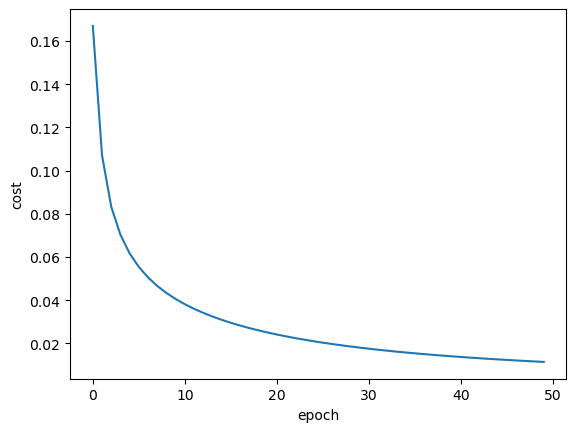

In [87]:
# Plot the learning curve
history = np.array(network.history)
plt.plot(range(len(history)), history[:, 1])
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [88]:
# Train network with learning rates of 0.5, 0.1, and 0.01
networks = []
learning_rates = [0.5, 0.1, 0.01]
for lr in learning_rates:
    network = NeuralNetwork(lr)
    network.train(inputs, labels, 50)
    networks.append(network)

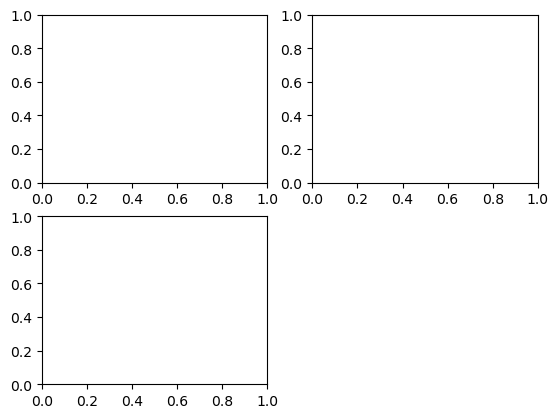

In [93]:
# Plot final classifier lines and learning curves for each learning rate
for i, network in enumerate(networks):
    x = np.linspace(-2, 3, 100)
    y = (-network.weights[0] * x - network.weights[2]) / network.weights[1]
    plt.subplot(2, 2, i+1)